# Netflix Data: Analysis and Visualization

Attributes information:

1. Show_id - Unique ID for every Movie / Tv Show<br>
2. Type - Identifier - A Movie or TV Show<br>
3. Title - Title of the Movie / Tv Show<br>
4. Director - Director of the Movie<br>
5. Cast - Actors involved in the movie/show<br>
6. Country - Country where the movie/show was produced<br>
7. Date_added - Date it was added on Netflix<br>
8. Release_year - Actual Release year of the movie/show<br>
9. Rating: TV Rating of the movie/show<br>
10. Duration - Total Duration in minutes or number of seasons<br>
11. Listed_in - Genre<br>
12. Description - The summary description<br>

## Objective:

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [3]:
netflix.shape

(8807, 12)

Dataset is having 8807 contents data with 12 attributes.

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* We can see date_added column is of object type which should be of datetime.
* Missing data in some columns.

In [5]:
netflix.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.0,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4


`show_id` and `description` column doesn't seem useful right now for visulazation.

In [6]:
netflix.head(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


* Nested data is there in columns `director`, `cast`, `country` and `listed_in`.
* `duration` column has minutes and season data.

## Data Cleaning


### Handling Missing data

In [7]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# Checking Percentage of Null values persent in each column

for i in netflix.columns:
    null_rate = netflix[i].isna().sum() / len(netflix) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {round(null_rate, 2)}%")

director's null rate : 29.91%
cast's null rate : 9.37%
country's null rate : 9.44%
date_added's null rate : 0.11%
rating's null rate : 0.05%
duration's null rate : 0.03%


There are lot of missing data in columns `director`, `cast` and `country` as compared to columns `date_added`, `rating` and `duration`.

In [9]:
# - Updating the missing values to 'NA' for 'director', 'cast' and 'country' columns.

data = netflix.copy()
data[['director', 'cast', 'country']]=netflix.loc[:,['director','cast','country']].fillna('NA')

In [10]:
# - Filling missing values with mode for columns 'date_added', 'rating' and duration. 

data['date_added'].fillna(data['date_added'].mode()[0], inplace=True)
data.rating.fillna(data.rating.mode()[0], inplace=True)

In [11]:
data.rating.value_counts(dropna=False)

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

We can see in rating column durations is also there so we will move this data to duration column.

In [12]:
data.loc[data.rating.str.contains('min'),'duration'] = data.loc[data.rating.str.contains('min'),'rating']
data.loc[data.rating.str.contains('min'), 'rating'] = data.rating.mode()[0]

In [13]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
# function to solve the nested problem for columns

def explode_data(df, col : str, name : str, along:str = 'year_added'):
    return (
    data
        [col]
        .apply(lambda x: x.replace(', ', ',').replace(' ,', ',').split(','))
        .to_frame()
        .set_index(data[along])
        .explode(col)
        .replace('', np.nan)
        .replace('NA', np.nan)
        .dropna()
        .stack()
        .to_frame()
        .reset_index()
        .drop('level_1', axis=1)
        .rename(columns={0:name})
)

We will handle nested column problem separately whenever we need to deal with it by using above function.

### Converting type of some columns

In [15]:
# - Converting 'date_added' column to datetime and adding new columns.

data.date_added = pd.to_datetime(data.date_added)
data['year_added'] = data.date_added.dt.year
data['month_added'] = data.date_added.dt.month_name()
data['day_added'] = data.date_added.dt.day_name()

# - Converting apropriate columns to category type.

data = data.astype({
    'type':'category', 
    'rating':'category'
})

## Analysis and Visualizations

In [16]:
sns.set_theme()

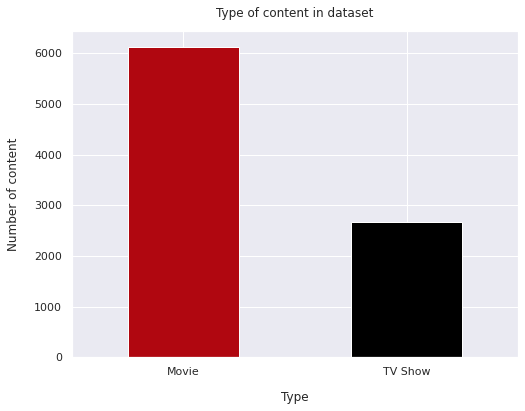

In [17]:
# - What type of content present in our data and their counts?

ax = data.type.value_counts().plot(kind='bar', figsize=(8,6), rot=0, color=["#B00710","#000000"])

ax.set_xlabel('Type', labelpad=14)
ax.set_ylabel('Number of content', labelpad=14)
ax.set_title('Type of content in dataset', pad=14)
plt.show()

### Conclusion:

Large number of Movies are added on Netflix as comapred to TV Shows.

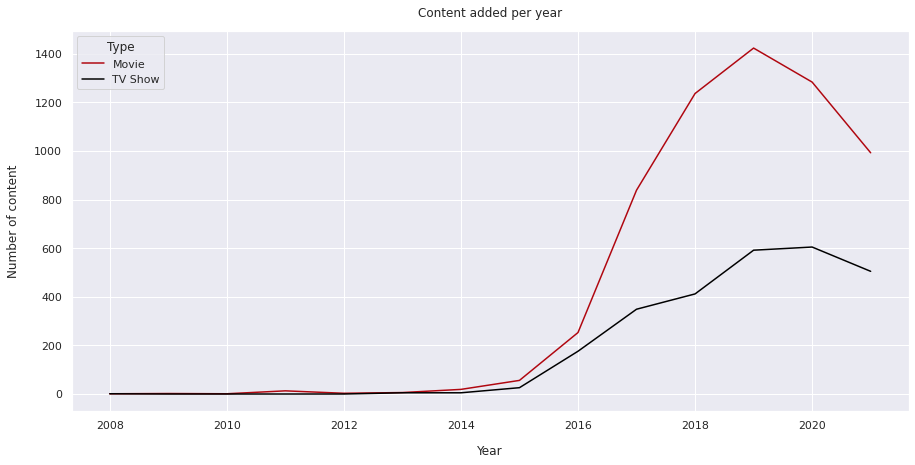

In [18]:
# - What type of content added on Netflix per year?

df = data.groupby('year_added')['type'].value_counts().reset_index()
df =df.rename(columns={'level_1': 'Type', 'type':'count'})
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(x='year_added', y='count', data=df, hue='Type', palette=["#B00710","#000000"])

ax.set_xlabel('Year', labelpad=14)
ax.set_ylabel('Number of content', labelpad=14)
ax.set_title('Content added per year', pad=14)
plt.show()

### Conclusion:

- After year 2015 alot of content is added on Netflix.
- Movies type content has been added on Netflix at much larger pace than TV Shows.<br>
- There is a significant drop in content addition in both type after 2019 that is because of Covid.


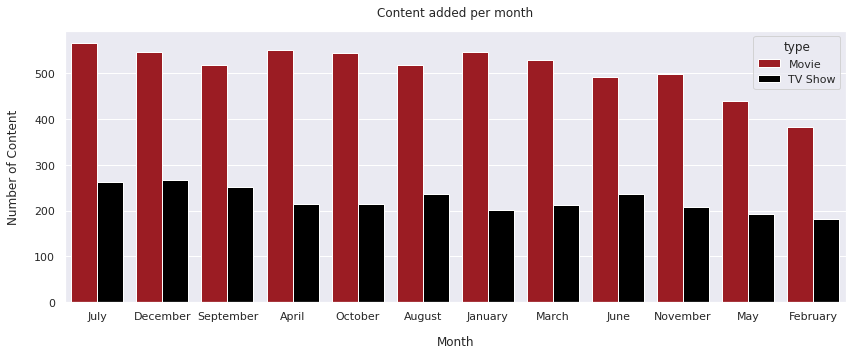

In [19]:
# - What is the number of content added on Netflix every month?

fig, ax = plt.subplots(figsize=(14, 5))

ax = sns.countplot(x='month_added',
                   data=data, hue='type', 
                   order=data.month_added.value_counts().index, 
                   palette=["#B00710","#000000"])

ax.set_xlabel('Month', labelpad=14)
ax.set_ylabel('Number of Content', labelpad=14)
ax.set_title('Content added per month', pad=14)
plt.show()

### Conclusion:

- In July and December most content was added on Netflix in total.
- That is because in these months TV Show are added mostly otherwise almost same count of movies are added on Netflix monthly.
- Also number of Movie content added is much higher than TV Show for every month.

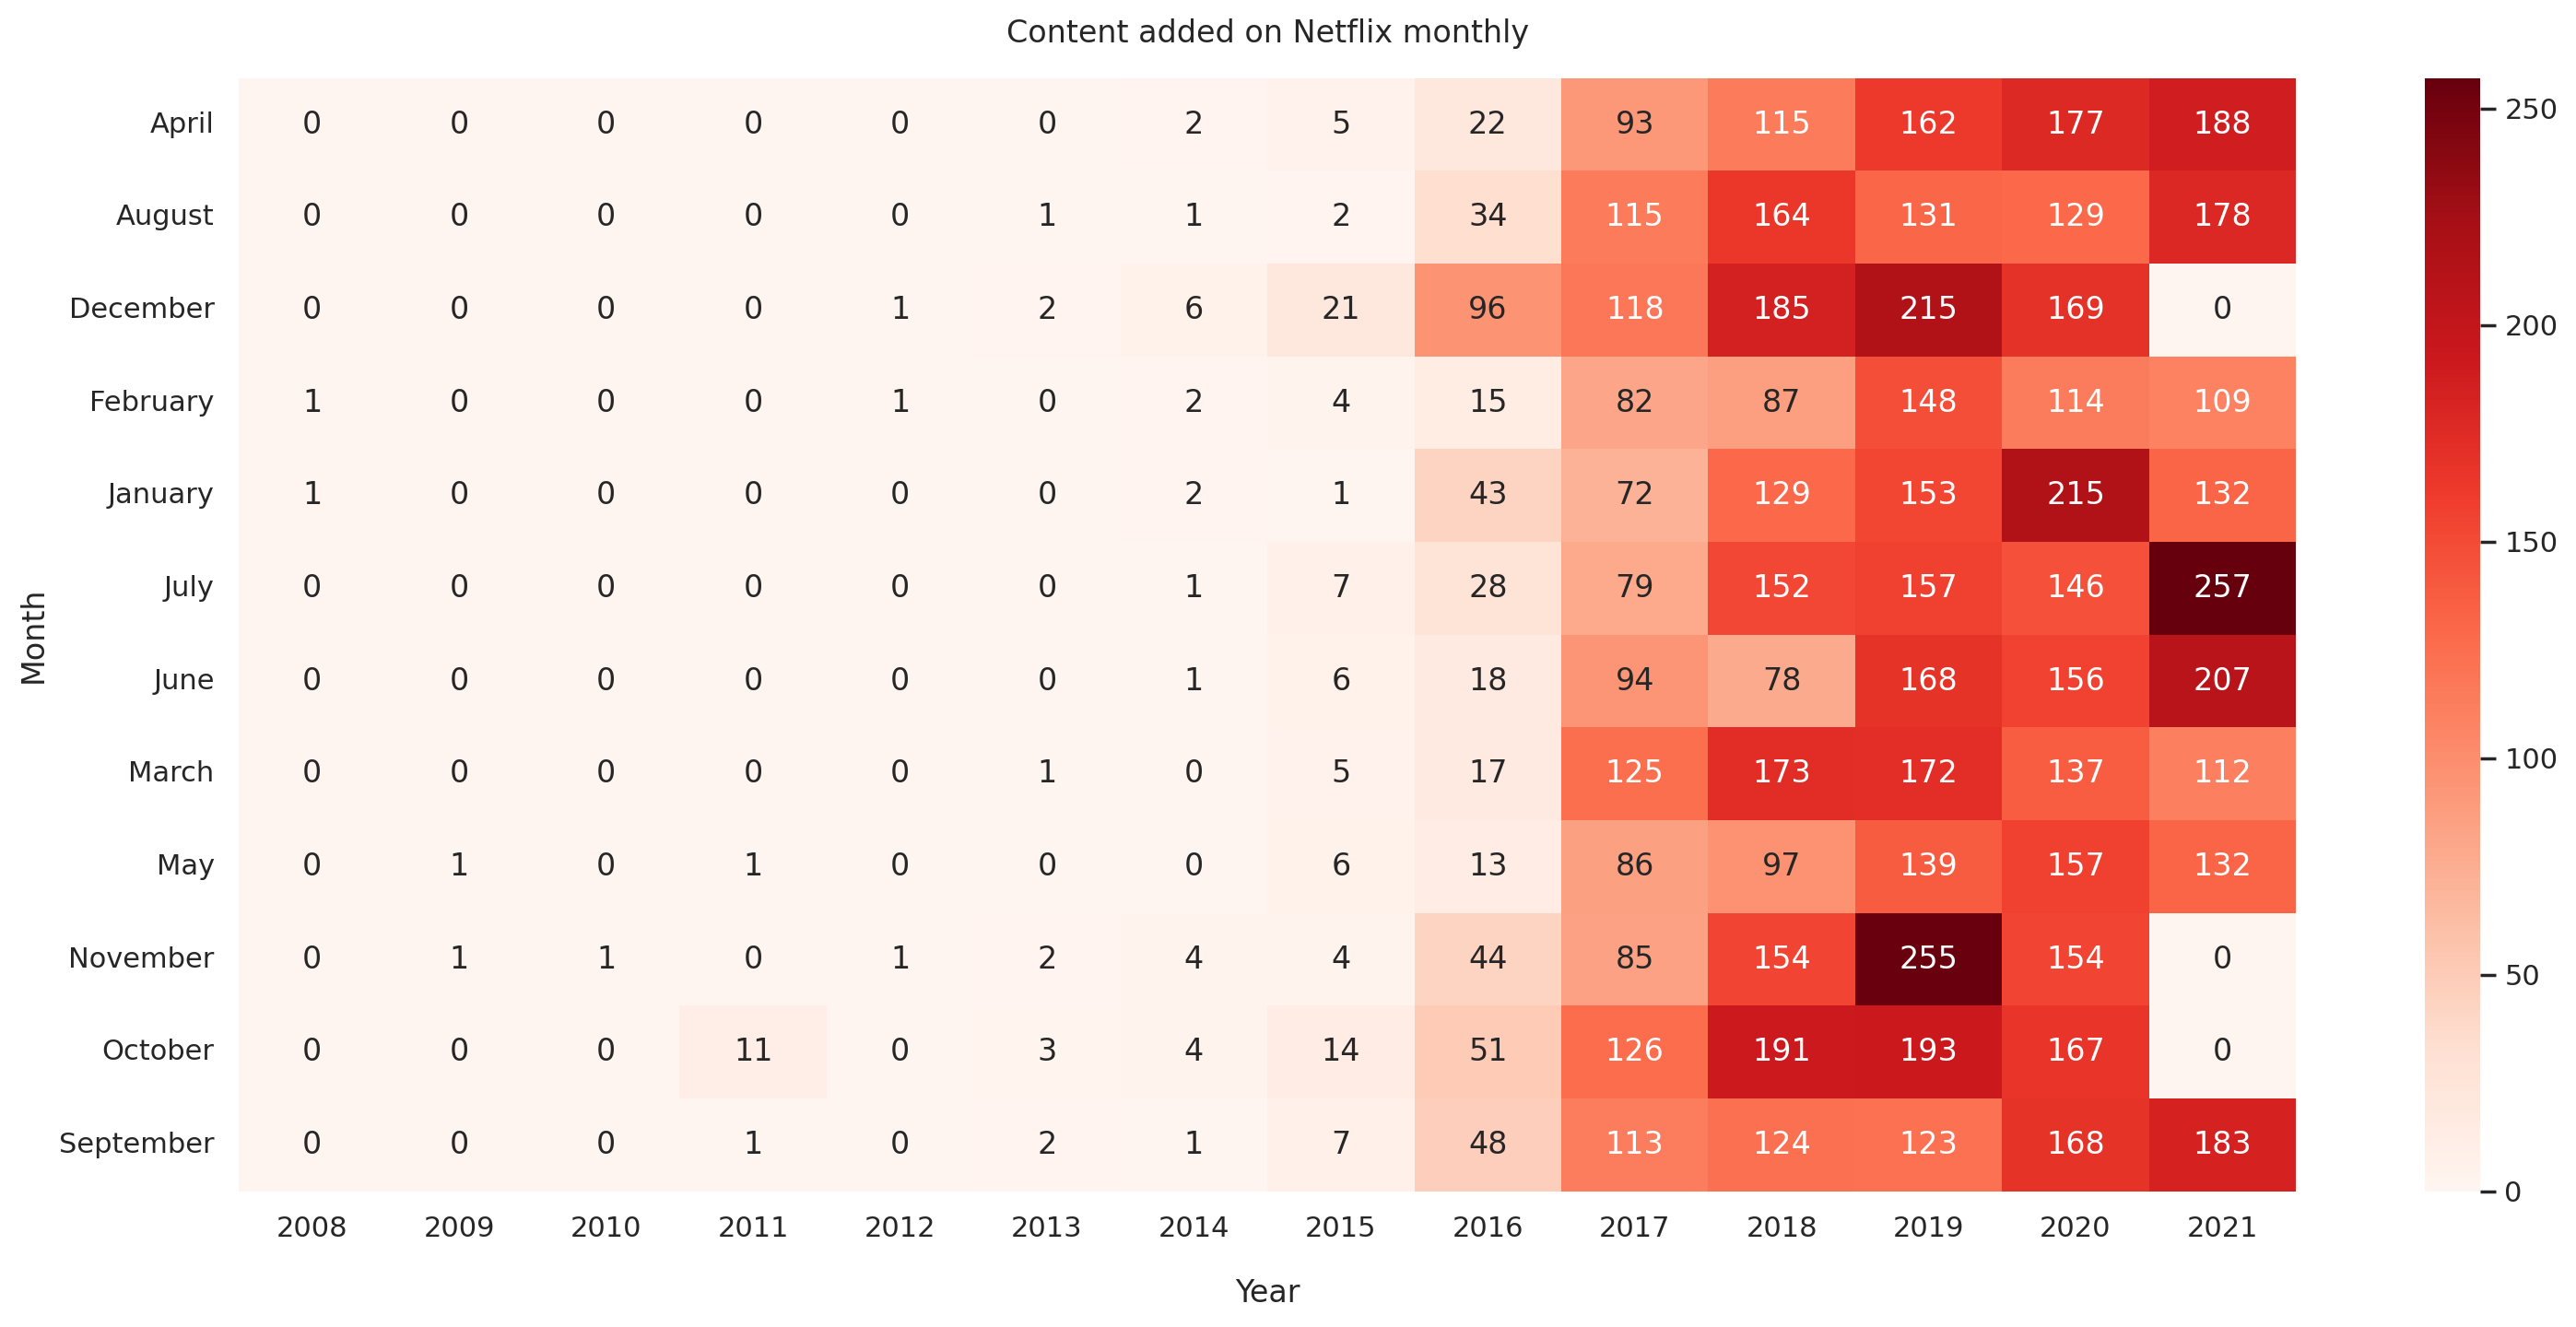

In [20]:
# - What is the count of content added monthly per year?

year_month_count = (
                    data
                    .loc[:,['year_added', 'month_added']]
                    .value_counts()
                    .reset_index()
                    .rename(columns={0:'count'})
                    .pivot("month_added", "year_added", "count")
                    .fillna(0)
                    .apply(lambda x: x.astype('int'))
                )

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(year_month_count, annot=True, fmt="d", cmap='Reds')
ax.set_xlabel('Year', labelpad=14)
ax.set_ylabel('Month')
ax.set_title('Content added on Netflix monthly', pad=14)
plt.show()


### Conclusion:

- Before 2021 content added in July is not very high.
- If we not consider the content added in 2021 as we don't have data for all months then more content is added in `October`, `November` and `December`.
- For year 2021 we don't have data after september.


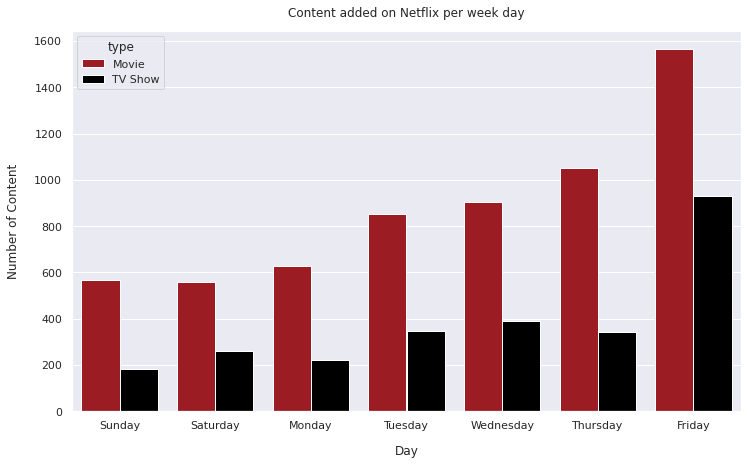

In [21]:
# - On which week day Netflix added most content?

plt.figure(figsize=(12, 7))
ax = sns.countplot(x='day_added',data=data, 
                   hue='type', 
                   order=data.day_added.value_counts().sort_values().index, 
                   palette=["#B00710","#000000"])

ax.set_title('Content added per week day')
ax.set_xlabel('Day', labelpad=14)
ax.set_ylabel('Number of Content', labelpad=14)
ax.set_title('Content added on Netflix per week day', pad=14)
plt.show()

### Conclusion:

- Large number of content added on Friday after Thursday.
- Also significant number of TV Show released on Friday than other days.

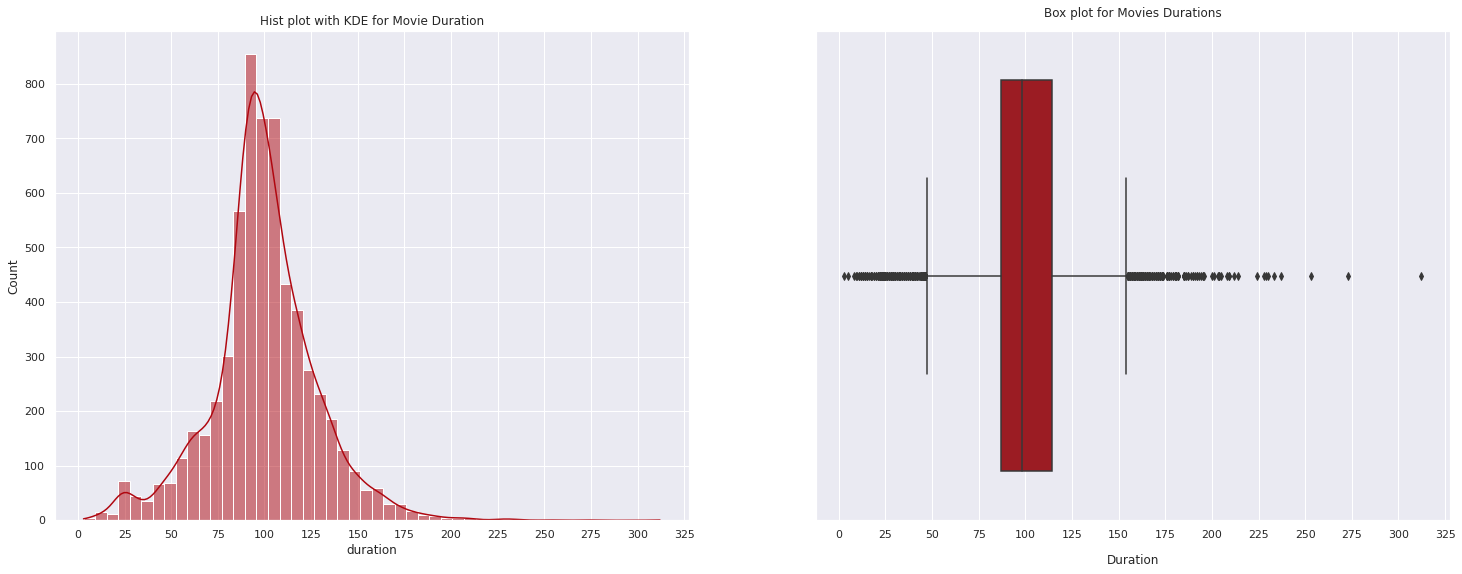

In [22]:
# - What is the most common durations of Movies?

movie_durations = data[data['duration'].str.contains('min')]['duration'].apply(lambda x: x.split()[0]).astype('int')

# Hist plot with KDE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,9))
g = sns.histplot(movie_durations, kde=True, color="#B00710", bins=50, ax = ax1)
ax1.set_title('Hist plot with KDE for Movie Duration')
g.set(xticks=np.arange(0, 350, 25))

# Box plot
sns.boxplot(x=movie_durations, color="#B00710", ax = ax2)
ax2.set_xticks(np.arange(0,350, 25))
ax2.set_xlabel('Duration', labelpad=14)
ax2.set_title('Box plot for Movies Durations', pad=14)
plt.show()

### Conclusion

- Generally Movies have duration range around 100.
- Also around 25 minutes there is a increase in count that is because of short films.

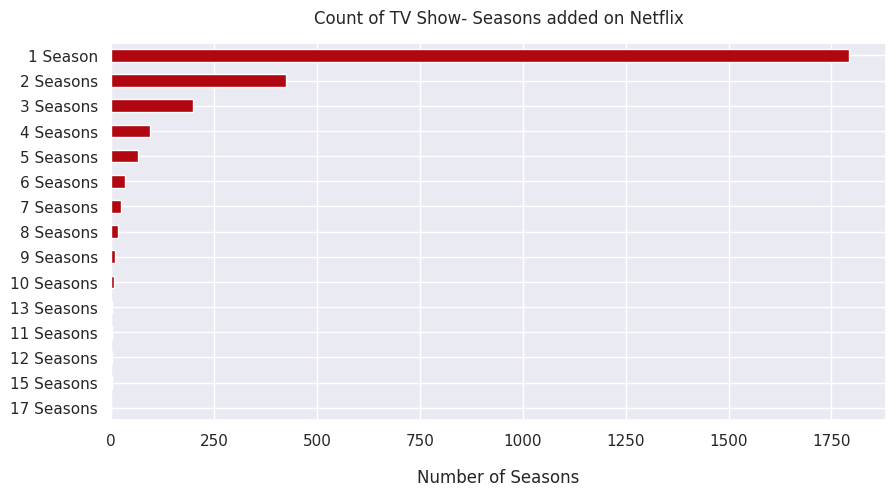

In [23]:
# - What is the most common number of seasons released on Netflix?

seasons = data[data['duration'].str.contains('Season')]['duration']

plt.figure(figsize=(10,5), dpi=100)
ax = seasons.value_counts().sort_values().plot(y='duration', kind='barh',color=["#B00710"])
ax.set_title('Content added per week day')
ax.set_xlabel('Number of Seasons', labelpad=14)

ax.set_title('Count of TV Show- Seasons added on Netflix', pad=14)
plt.show()

### Conclusion

* There is a significant drop of count of seasons after season 1.
* Tv shows are of 1 - 2 Seasons mostly.

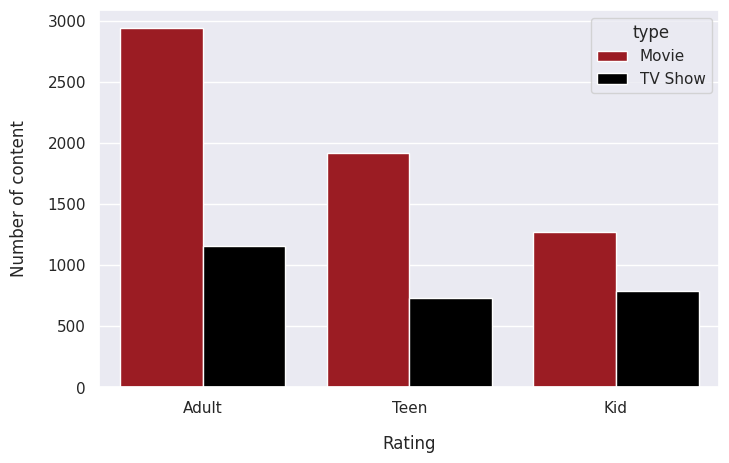

In [24]:
# - What is the count of content added as per audiance type?

# We are dividing audiance in three types as per rating column
Kids = ['TV-Y', 'TV-Y7', 'G', 'TV-G', 'PG', 'TV-PG', 'TV-Y7-FV']
Teens = ['PG-13', 'TV-14']
Adults = ['R', 'TV-MA', 'NC-17', 'UR', 'NR']

def rate(x):
    if x in Kids:
        return 'Kid'
    elif x in Teens:
        return 'Teen'
    elif x in Adults:
        return 'Adult'
    
df1 = data['rating'].apply(rate)
df2 = pd.concat([df1, data['type']], axis=1)
plt.figure(figsize=(8,5), dpi=100)
ax = sns.countplot(x='rating',data=df2, hue='type', order=['Adult', 'Teen', 'Kid'], palette=["#B00710","#000000"])
ax.set_ylabel('Number of content', labelpad=14)
ax.set_xlabel('Rating', labelpad=14)
plt.show()

### Conclusion

* Netflix added alot of adults movies as compare to adult TV shows.
* Adult and Teen content is the most common content on netflix.

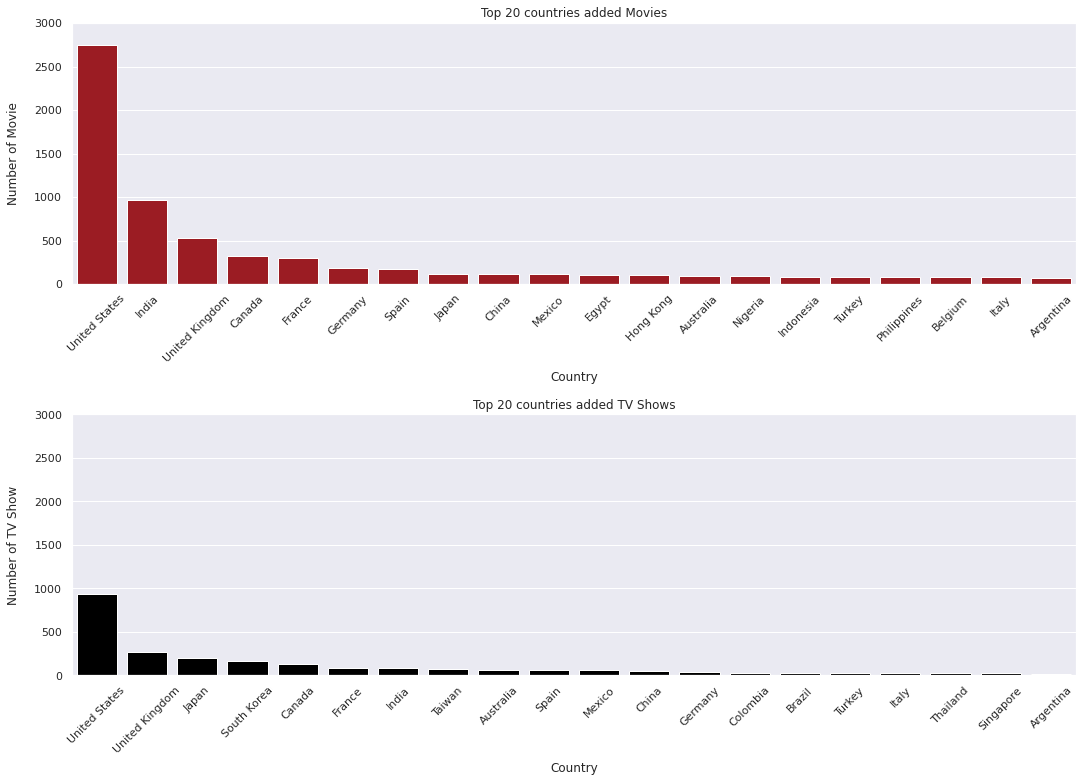

In [25]:
# - What is the count of content added for Top 20 countries in the respective content types?

country_data = explode_data(data, 'country', 'country', 'type')
df = country_data.value_counts().reset_index(level=1)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(18,12))
fig.subplots_adjust(hspace=0.5)

sns.barplot(x='country',y =0, data=df.loc['Movie'].head(20), color="#B00710", ax=ax1, )
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_title('Top 20 countries added Movies')
ax1.set_ylabel('Number of Movie', labelpad=14)
ax1.set_xlabel('Country', labelpad=7)
ax1.set_yticks(np.arange(0,3500,500))


sns.barplot(x='country',y =0, data=df.loc['TV Show'].head(20), color="#000000", ax = ax2)
ax2.set_title('Top 20 countries added TV Shows')
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_ylabel('Number of TV Show', labelpad=14)
ax2.set_xlabel('Country', labelpad=7)
ax2.set_yticks(np.arange(0,3500,500))
plt.show()



### Conclusion:

- The order of top 20 Movie and TV Show is different.
- In countries like `India`, `Spain`, `Germay` Movies are more popular than TV Shows.
- In countries like `Japan`, `South Korea`, `Taiwan` TV Shows are more popular than Movies.

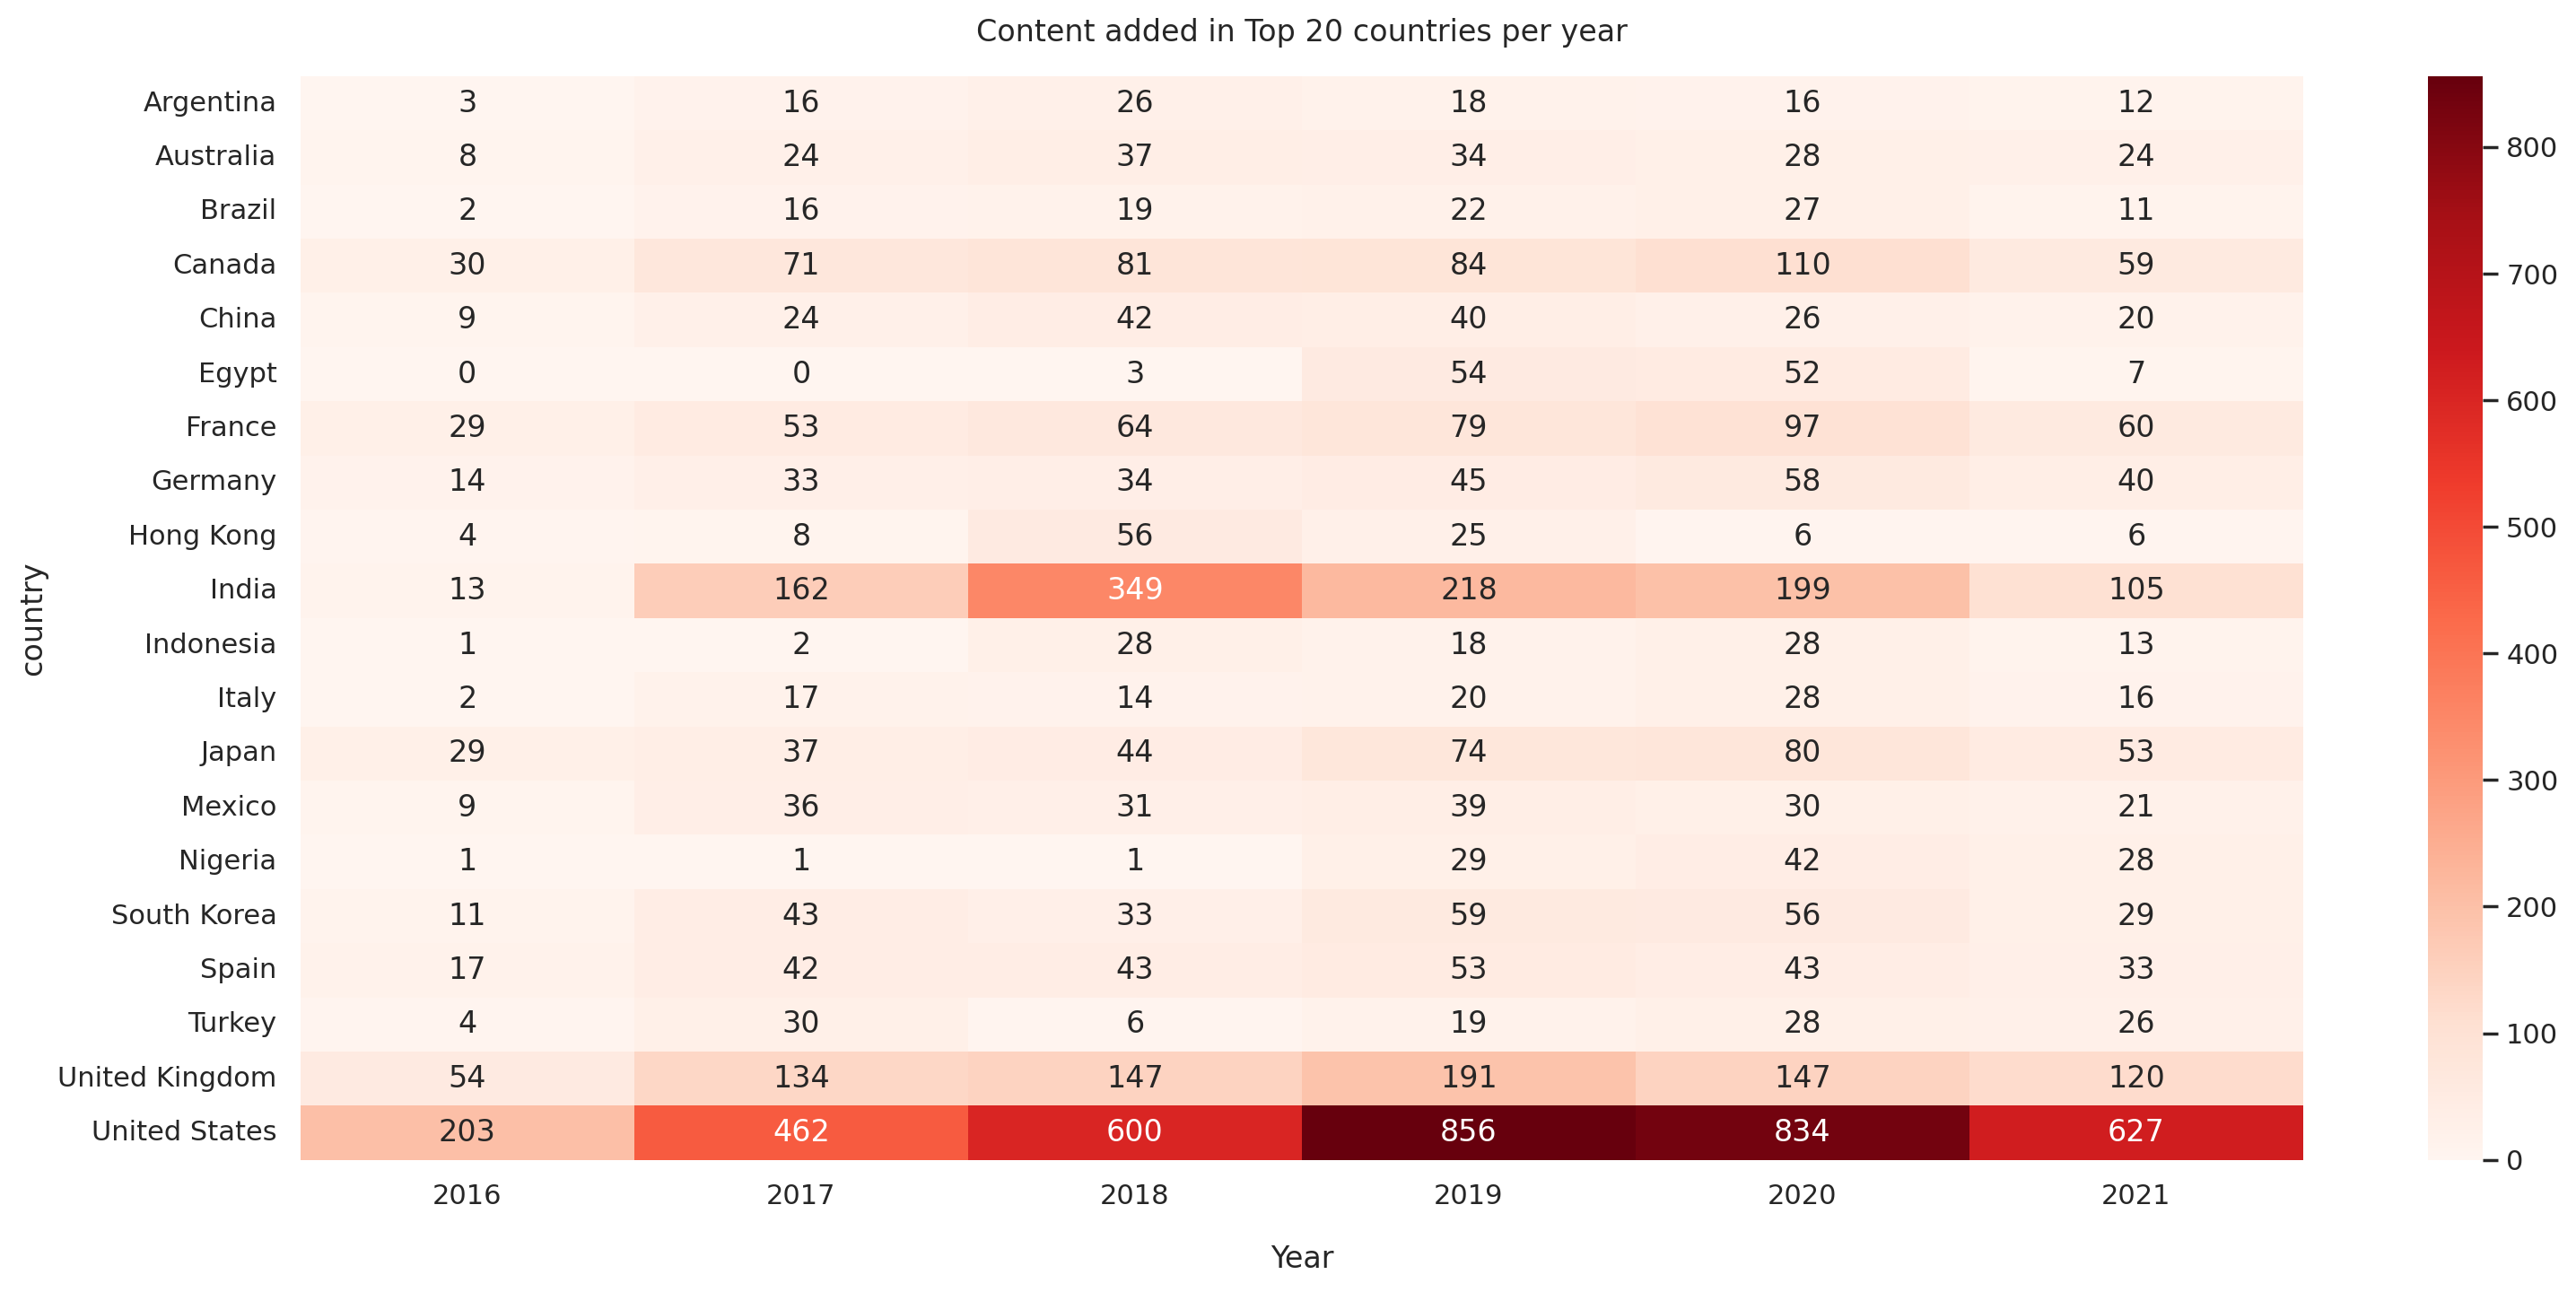

In [26]:
# - What is the count of content added for Top 20 countries per year?

country_data = explode_data(data, 'country', 'country')

country_data = country_data[country_data['year_added']>2015]
country_data = (
    country_data
    [country_data['country'].isin(country_data['country'].value_counts().head(20).index)]
    .value_counts()
    .reset_index()
    .pivot("country", "year_added", 0)
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(country_data, annot=True, fmt="d", cmap='Reds')

ax.set_xlabel('Year', labelpad=14)
ax.set_title('Content added in Top 20 countries per year', pad=14)
plt.show()

### Conclusion:

- Top 5 countries where netflix is adding more content per year except United States are `India`, `United Kingdom`, `Canada`, `France` and `Japan`.

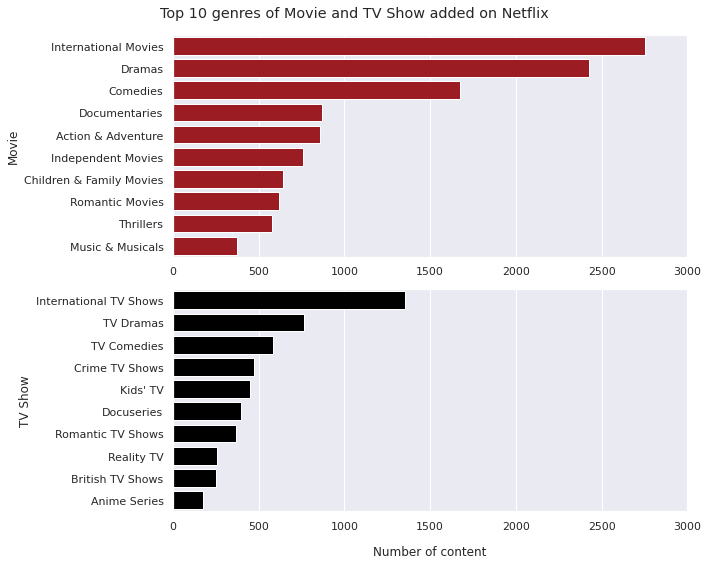

In [27]:
# - What are the top genres popular on netflix?

genre_data = explode_data(data, 'listed_in', 'genre', 'type')
df = genre_data.value_counts().reset_index(level=1)

fig, ax = plt.subplots(2,1, figsize=(10, 8))

fig.subplots_adjust(hspace=0.9)
sns.barplot(x=0,y ='genre', data=df.loc['Movie'].head(10), color="#B00710", ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Movie')
ax[0].set_xticks(np.arange(0,3500,500))

sns.barplot(x=0,y ='genre', data=df.loc['TV Show'].head(10), color="#000000", ax=ax[1])
ax[1].set_xlabel('Number of content', labelpad=14)
ax[1].set_ylabel('TV Show')
ax[1].set_xticks(np.arange(0,3500,500))
fig.suptitle('Top 10 genres of Movie and TV Show added on Netflix')
fig.tight_layout()

### Conclusion:

- TV Show genres `Crime TV Shows` and `Kids' TV` are more popular than their similar genre in Movies.
- Movie genres `Documentaries` and `Action & Adventure` are more popular than their similar genre in TV Show.

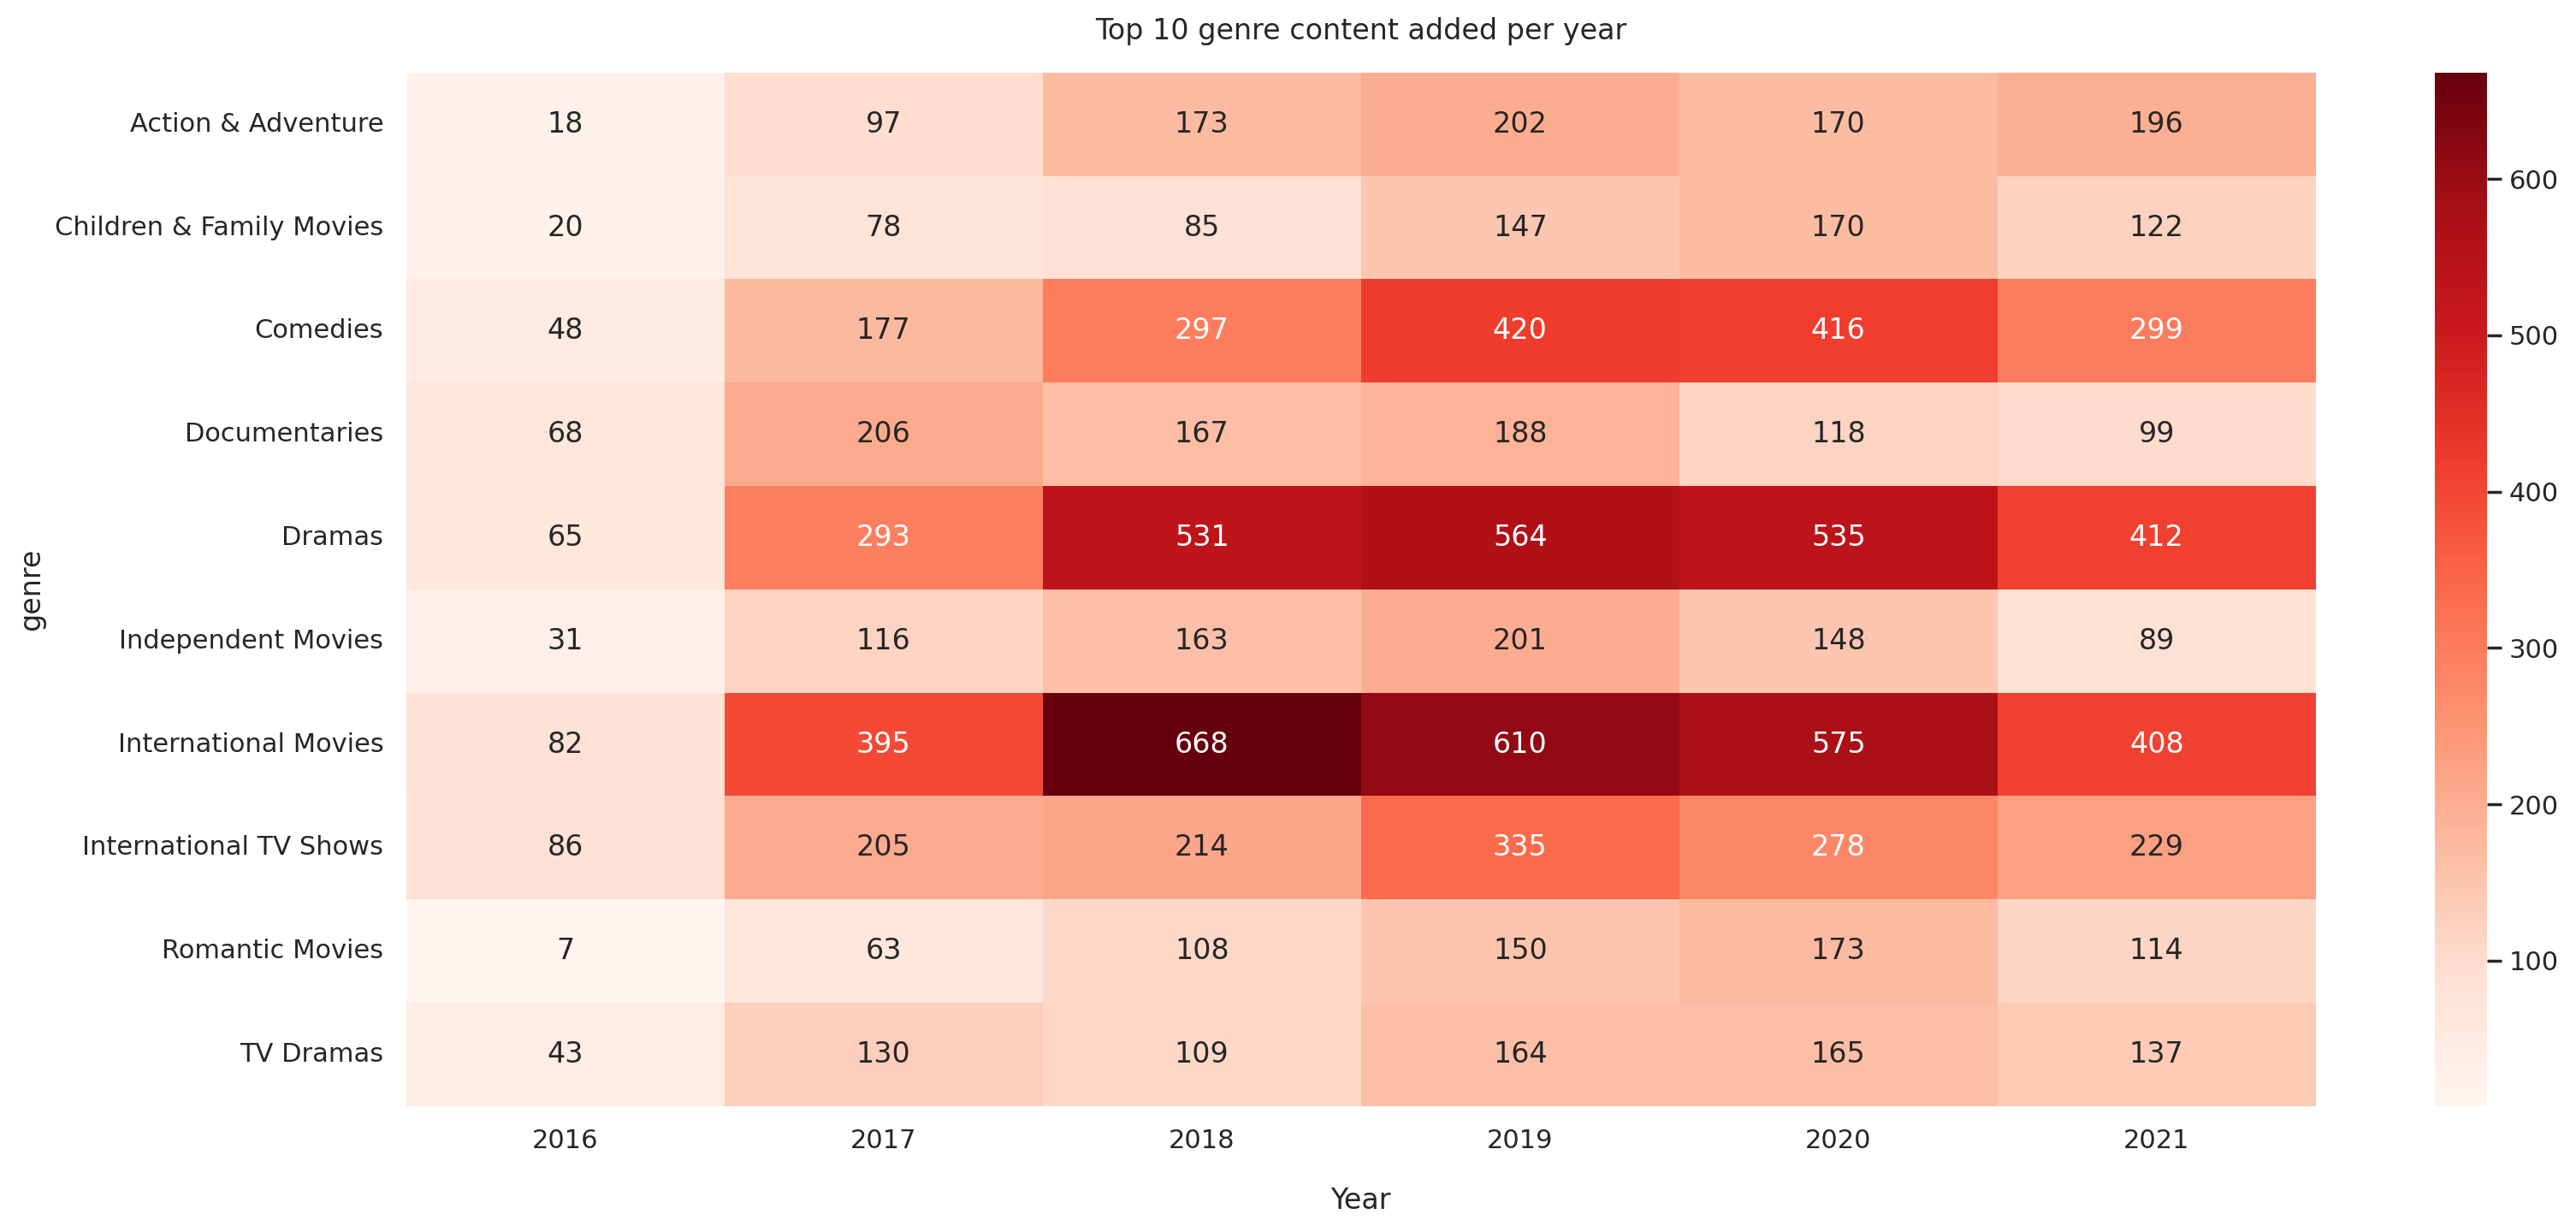

In [28]:
# What are the most popular genres added mostly per year on Netflix?

genre_data = explode_data(data, 'listed_in', 'genre')

genre_data = genre_data[genre_data['year_added']>2015]
genre_data = (
    genre_data
    [genre_data['genre'].isin(genre_data['genre'].value_counts().head(10).index)]
    .value_counts()
    .reset_index()
    .pivot("genre", "year_added", 0)
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(genre_data, annot=True, fmt="d", cmap='Reds')

ax.set_xlabel('Year', labelpad=14)
ax.set_title('Top 10 genre content added per year', pad=14)
plt.show()

### Conclusion 
* Five most popular genres in recent years are **International movies, Dramas, Comedies, International TV Shows and Action & Adventure.**

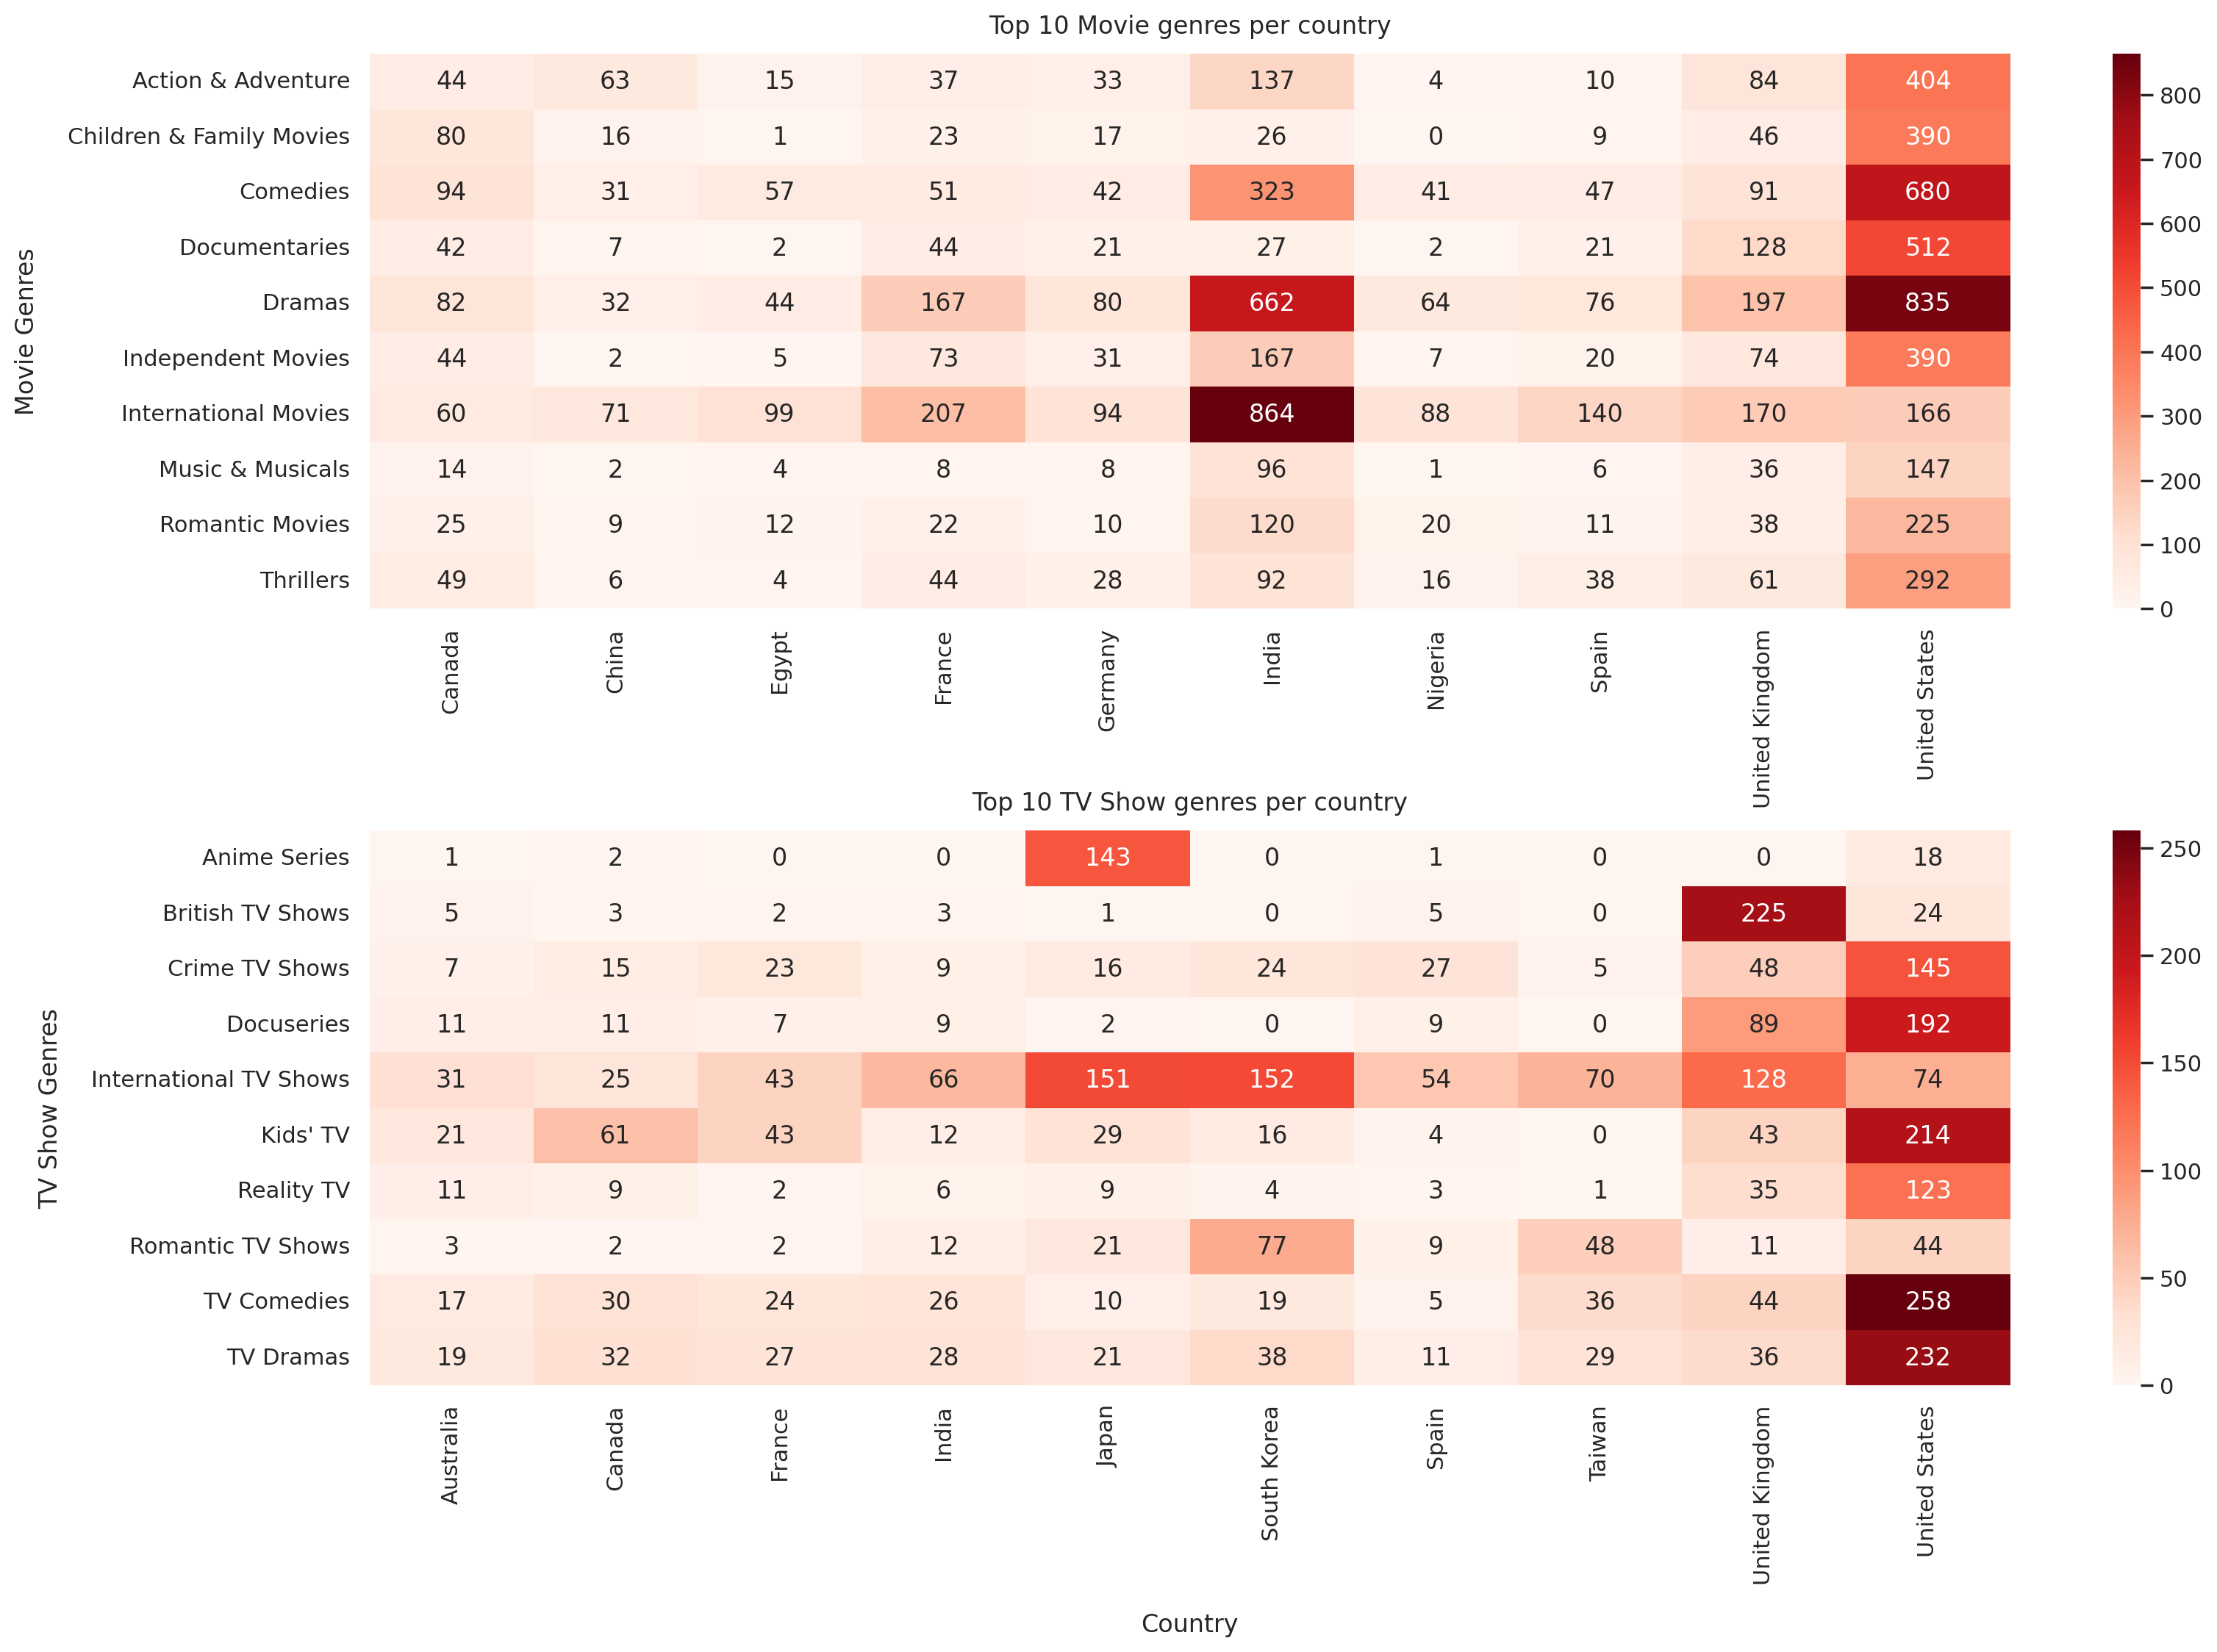

In [29]:
# What are the most popular genres added mostly in Top 10 country on Netflix?

country_data = explode_data(data, 'country', 'country', 'title')
genre_data = explode_data(data, 'listed_in', 'genre', 'title')
genre_data_type = explode_data(data, 'listed_in', 'genre', 'type')

genre_data_type = genre_data_type.value_counts().reset_index(level=1)
top_movie_genres = list(genre_data_type.loc['Movie'].head(10)['genre'].values)
top_tv_genres = list(genre_data_type.loc['TV Show'].head(10)['genre'].values)

df = country_data.merge(genre_data).drop('title', axis=1)
df1 = df[df['genre'].isin(top_movie_genres)]
df2 = df[df['genre'].isin(top_tv_genres)]

def make_data(df):
    return (
        df
        [df['country'].isin(df['country'].value_counts().head(10).index)]
        .value_counts()
        .reset_index()
        .pivot("genre", "country", 0)
        .fillna(0)
        .apply(lambda x: x.astype('int'))
        )

df1 = make_data(df1)
df2 = make_data(df2)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,12), dpi=200)
fig.subplots_adjust(hspace=0.4)

sns.heatmap(df1, annot=True, fmt="d", cmap='Reds', ax=ax1)
ax1.set_xlabel('Country', labelpad=14)
ax1.set_ylabel('Movie Genres', labelpad=14)
ax1.set_title('Top 10 Movie genres per country', pad=10)

sns.heatmap(df2, annot=True, fmt="d", cmap='Reds', ax=ax2)
ax2.set_xlabel('Country', labelpad=14)
ax2.set_ylabel('TV Show Genres', labelpad=14)
ax2.set_title('Top 10 TV Show genres per country', pad=10)
plt.show()

In [30]:
%%html
<style>
table{float:left}
</style>

### Conclusion:

Top 3 genres in movies for top 3 countries are-

| Country | Genres      
| :- | :-:
|United States| Dramas, Comedies, Action & Adventure
|India| International Movies, Dramas and Comedies
|United Kingdom| Dramas, International Movies, Documentries

<br><br><br><br><br><br>
Top 3 genres in TV Shows for top 3 countries are-

| Country | Genres      
| :- | :-:
|United States| TV Comedies, TV Dramas, Kids' TV
|United Kingdom| British TV Shows, International TV Shows, Docuseries
|Japan| International TV Shows, Anime Series, Kids' TV





In [31]:
cast_data = explode_data(data, 'cast', 'cast')
cast_data[cast_data['year_added']>=2019]['cast'].value_counts().head(10)

Julie Tejwani        33
Rupa Bhimani         31
Rajesh Kava          26
Jigna Bhardwaj       23
Samuel L. Jackson    22
Takahiro Sakurai     22
Amitabh Bachchan     20
Naseeruddin Shah     19
Anupam Kher          19
Yuki Kaji            18
Name: cast, dtype: int64

### Conclusion

* In recent years netflix has added content in which top people casted are generally Voice actors. So no clear indication we can get from this data.
* As voice artists have majorly worked in animated movies/Tv shows that is not in Top genres in recent years.

In [32]:
director_data = explode_data(data, 'director', 'director')
director_data[director_data['year_added']>=2019]['director'].value_counts().head(10)

Rajiv Chilaka          22
Suhas Kadav            15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg        9
Kunle Afolayan          8
Hanung Bramantyo        8
Robert Rodriguez        8
Clint Eastwood          7
Name: director, dtype: int64

### Conclusion

* Same pattern we can see here, the top 2 director who directed most movies/Tv shows is for animated content added in recent years.

In [33]:
cast_data = explode_data(data, 'cast', 'cast', 'type')
cast_data.value_counts().loc['Movie'].head(10)

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Amitabh Bachchan    28
Julie Tejwani       28
Paresh Rawal        28
Boman Irani         27
Rupa Bhimani        27
dtype: int64

### Conclusion:

- We can see that in top 10 Movie cast, most people is from India.

In [34]:
cast_data.value_counts().loc['TV Show'].head(10)

cast
Takahiro Sakurai      25
Yuki Kaji             19
Junichi Suwabe        17
Ai Kayano             17
Daisuke Ono           17
Yuichi Nakamura       16
Yoshimasa Hosoya      15
Jun Fukuyama          15
David Attenborough    14
Hiroshi Kamiya        13
dtype: int64

### Conclusion:

- We can see that in top 10 TV Show cast, most people is from Japan.

## Summary:

- Netflix added more Movie than TV Show.
- After 2019 there is a drop in content added. Drop in Movie content is more than TV Show content.
- If we not consider the content added in 2021 as we don't have data for all months then more content is added in `October`, `November` and `December`.
- More content for adults is there on Netflix.
- Most of the content is added on Friday and Thursday respectively.
- United states has added most content on Netflix.
- Top 5 countries where netflix is adding more content per year except United States are `India`, `United Kingdom`, `Canada`, `France` and `Japan`.
- Five most popular genres in recent years are _International movies, Dramas, Comedies, International TV Shows and Action & Adventure._


#### Movie

- Almost same count of movies added on Netflix monthly.
- In countries like `India`, `Spain`, `Germany` Movies are more popular than TV Shows.
- Movies are of duration around 100 minutes.
- Top 5 countries where movies added are _United States, India, United Kingdom, Canada and France._
- Top 3 genres in Movies are _International Movies, Dramas and Comedies._
- Top people casted in Movies are from India.


#### TV Show

- Large number of TV Show added on Friday than other weekday.
- TV Shows have mostly season 1 and season 2 respectively.
- In countries like `United Kingdom`, `Japan`, `South Korea`, `Taiwan` TV Shows are more popular than Movies.
- Top 5 countries where movies added are _United States, United Kingdom, Japan, South Korea and Canada._
- Top 3 genres in Movies are _International TV Shows, TV Dramas and TV Comedies._
- Top people casted in TV Shows are from Japan.



## Recommendations:

#### Movie

- Netflix should be focusing on adding more movies in emerging countries like _India, United Kingdom, Canada and France_ for Adult audience.
- Preferred Duration of movies will be from 80-120 minutes.
- International Movies, Dramas, Comedies should be the preferred genres for Movies.


#### TV Show

- For TV Shows Netflix should focus on countries like _Japan, South Korea, Canada and France_.
- TV Show seasons can be up to 3 preferably.
- International TV Shows, TV Dramas, TV Comedies should be the preferred genres for TV Shows.

